In [ ]:
import sys

import matplotlib.pyplot as plt
import PIL
from PIL import Image
import json

import torch
import torchvision
import torchvision.transforms as T

# check whether run in Colab
if 'google.colab' in sys.modules:
    print('Running in Colab.')
    !pip3 install timm==0.5.4

from timm import create_model

Running in Colab.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.5/431.5 kB 21.4 MB/s eta 0:00:00
  Attempting uninstall: timm
    Found existing installation: timm 1.0.11
    Uninstalling timm-1.0.11:
      Successfully uninstalled timm-1.0.11


In [ ]:
model_name = "convnext_xlarge_in22k"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print("device = ", device)
# create a ConvNeXt model : https://github.com/rwightman/pytorch-image-models/blob/master/timm/models/convnext.py
model = create_model(model_name, pretrained=True).to(device)

device =  cuda


Downloading: "https://dl.fbaipublicfiles.com/convnext/convnext_xlarge_22k_224.pth" to /root/.cache/torch/hub/checkpoints/convnext_xlarge_22k_224.pth


In [ ]:
# Define transforms for test
from timm.data.constants import \
    IMAGENET_DEFAULT_MEAN, IMAGENET_DEFAULT_STD

NORMALIZE_MEAN = IMAGENET_DEFAULT_MEAN
NORMALIZE_STD = IMAGENET_DEFAULT_STD
SIZE = 256

# Here we resize smaller edge to 256, no center cropping
transforms = [
              T.Resize(SIZE, interpolation=T.InterpolationMode.BICUBIC),
              T.ToTensor(),
              T.Normalize(NORMALIZE_MEAN, NORMALIZE_STD),
              ]

transforms = T.Compose(transforms)

In [ ]:
!wget https://dl.fbaipublicfiles.com/convnext/label_to_words.json
imagenet_labels = json.load(open('label_to_words.json'))

--2024-11-03 06:56:24--  https://dl.fbaipublicfiles.com/convnext/label_to_words.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.102, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 773945 (756K) [application/json]
Saving to: ‘label_to_words.json’

label_to_words.json 100%[===================>] 755.81K   957KB/s    in 0.8s    

2024-11-03 06:56:26 (957 KB/s) - ‘label_to_words.json’ saved [773945/773945]



In [ ]:
!wget https://dl.fbaipublicfiles.com/convnext/test.jpeg
img = PIL.Image.open('test.jpeg')
img_tensor = transforms(img).unsqueeze(0).to(device)

--2024-11-03 06:56:26--  https://dl.fbaipublicfiles.com/convnext/test.jpeg
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 108.157.254.15, 108.157.254.102, 108.157.254.124, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|108.157.254.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 165227 (161K) [image/jpeg]
Saving to: ‘test.jpeg’

test.jpeg           100%[===================>] 161.35K   342KB/s    in 0.5s    

2024-11-03 06:56:27 (342 KB/s) - ‘test.jpeg’ saved [165227/165227]



egg, eggs 51.08%
electric refrigerator, fridge 12.15%
boiled egg, coddled egg 4.40%
incubator, brooder 3.29%
ovoid 3.18%


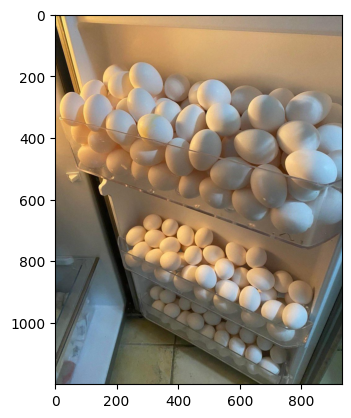

In [ ]:
# inference
output = torch.softmax(model(img_tensor), dim=1)
top5 = torch.topk(output, k=5)
top5_prob = top5.values[0]
top5_indices = top5.indices[0]

for i in range(5):
    labels = imagenet_labels[str(int(top5_indices[i]))]
    prob = "{:.2f}%".format(float(top5_prob[i])*100)
    print(labels, prob)

plt.imshow(img)